In [246]:
import numpy as np
import matplotlib.pyplot as plt

In [247]:
P = np.array(
    [
        [0.0, 0.5, 0.5, 0.0],
        [0.2, 0.0, 0.0, 0.8],
        [0.8, 0.0, 0.0, 0.2],
        [0.0, 0.2, 0.2, 0.6]
    ]
)

In [248]:
nS = 4

In [249]:
R = np.array([0, 0, 0, 1]).reshape(-1, 1)

In [250]:
gamma = 0.8

In [251]:
A = np.eye(P.shape[0]) - gamma * P
b = R
V = np.linalg.inv(A) @ R

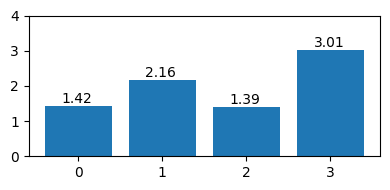

In [253]:
plt.figure(figsize=(4, 2))
plt.bar(range(nS), V.flatten())
plt.ylim(0, 4)
for i, v in enumerate(V.flatten()):
    plt.text(i - 0.2, v + 0.1, np.around(v, 2))
plt.tight_layout()
plt.show()

In [254]:
V = np.zeros((4, 1))
Vs = [V.flatten()]
for _ in range(40):
    V = R + gamma * P @ V
    Vs.append(V.flatten())

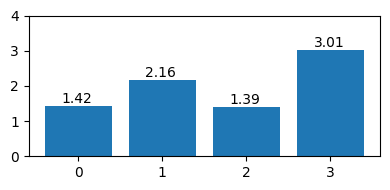

In [255]:
plt.figure(figsize=(4, 2))
plt.bar(range(nS), V.flatten())
plt.ylim(0, 4)
for i, v in enumerate(V.flatten()):
    plt.text(i - 0.2, v + 0.1, np.around(v, 2))
plt.tight_layout()
plt.show()

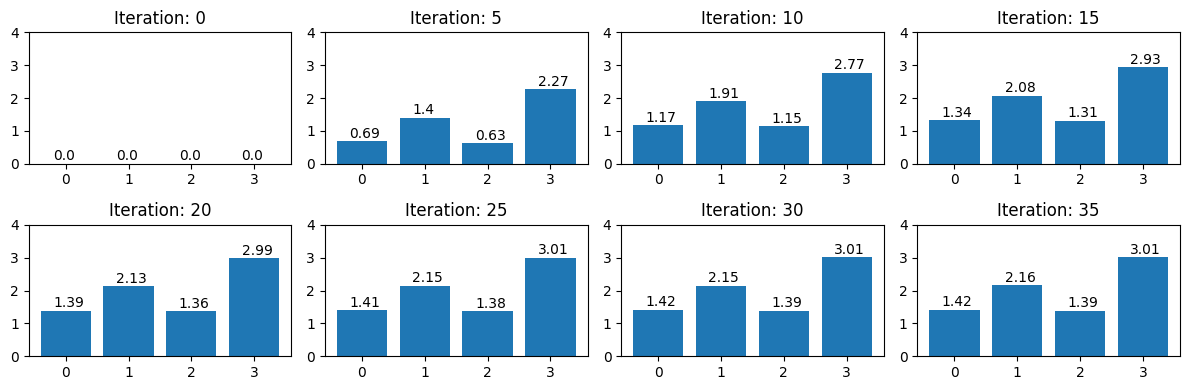

In [256]:
fig, axes = plt.subplots(2, 4, figsize=(12, 4))
axes = axes.flatten()
for i in range(8):
    axes[i].set_title(f'Iteration: {i*5}')
    axes[i].bar(range(nS), Vs[i*5])
    axes[i].set_ylim(0, 4)
    for j, v in enumerate(Vs[i*5]):
        axes[i].text(j - 0.2, v + 0.1, np.around(v, 2))
plt.tight_layout()
plt.show()

In [257]:
V = np.zeros((4, 1))
Vs = []
for _ in range(10000):
    V = R + P @ V
    Vs.append(V)

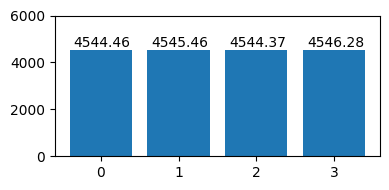

In [258]:
plt.figure(figsize=(4, 2))
plt.bar(range(nS), V.flatten())
plt.ylim(0, 6000)
for i, v in enumerate(V.flatten()):
    plt.text(i - 0.35, v + 100, np.around(v, 2))
plt.tight_layout()
plt.show()

In [264]:
N = 100000
Gs = []
for _ in range(N):
    G = 0
    s = 0
    for i in range(50):
        r = R[s, 0]
        G += (gamma**i) * r
        p = P[s, :]
        s = np.random.choice(nS, p=p)
    Gs.append(G)
V = sum(Gs) / N
print(f"Estimated Value Function: {np.around(V, 2)}")

Estimated Value Function: 1.42


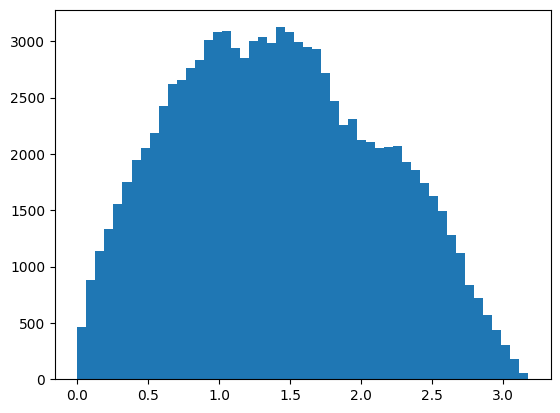

In [265]:
plt.hist(Gs, bins=50);